## Project Fandango

finding bias in Fandango's 2015 ratings. higher ratings to sell more tickets

https://fivethirtyeight.com/features/fandango-movies-ratings/

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
all_sites = pd.read_csv('all_sites_scores.csv')

In [23]:
fandango = pd.read_csv('fandango_scrape.csv')

In [25]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [27]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [29]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


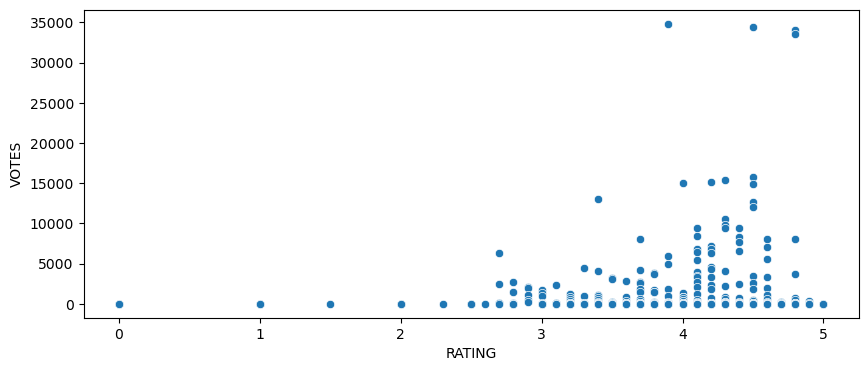

In [38]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=fandango, x='RATING', y='VOTES');

In [43]:
fandango.corr(numeric_only=True)

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [56]:
fandango['YEAR'] = fandango['FILM'].apply(lambda x: x[-6:].replace('(', '').replace(')', ''))
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


In [58]:
fandango['YEAR'].value_counts()

YEAR
2015    478
2014     23
2016      1
1964      1
2012      1
Name: count, dtype: int64

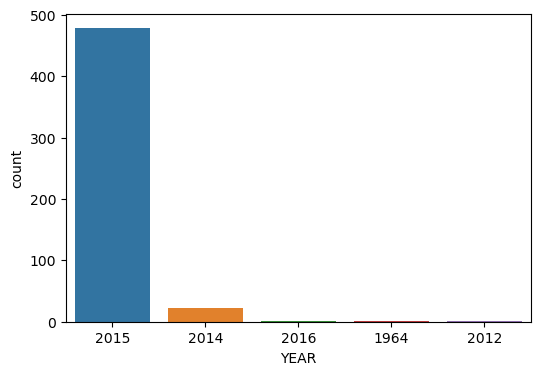

In [219]:
plt.figure(figsize=(6,4))
sns.countplot(data=fandango, x='YEAR', hue='YEAR');

In [83]:
fandango.sort_values('VOTES', ascending=False)[:10]

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [127]:
len(fandango[fandango['VOTES'] == 0])

69

In [159]:
fandango_reviewed = fandango.drop(fandango[fandango['VOTES'] == 0].index)
fandango_reviewed

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


As noted in the article, due to HTML and star rating displays, the true user rating may be slightly different than the rating shown to a user. Let's visualize this difference in distributions.

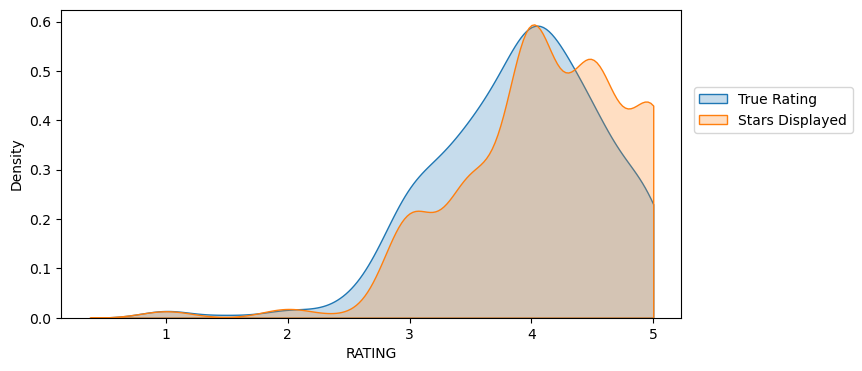

In [201]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.kdeplot(data=fandango_reviewed, x='RATING', fill=True, clip=[0,5], label='True Rating')
sns.kdeplot(data=fandango_reviewed, x='STARS', fill=True, clip=[0,5], label='Stars Displayed')
plt.legend(loc=(1.02, 0.6));

In [208]:
fandango_reviewed['STARS_DIFF'] = (fandango_reviewed['STARS'] - fandango_reviewed['RATING']).round(1)
fandango_reviewed

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


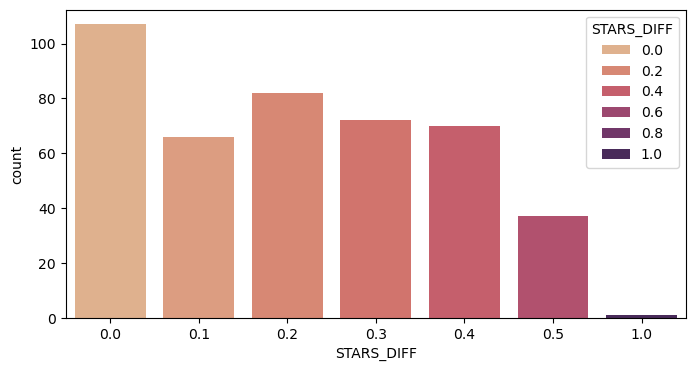

In [227]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(data=fandango_reviewed, x='STARS_DIFF', hue='STARS_DIFF', palette='flare');

In [236]:
fandango_reviewed.sort_values('STARS_DIFF', ascending=False)[:1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


Turbo Kid the movie with greatest discrepancy

# Let's now compare the scores from Fandango to other movies sites and see how they compare.


In [245]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


In [247]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [249]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


exploring the relationship between RottenTomatoes Critic reviews and RottenTomatoes User reviews

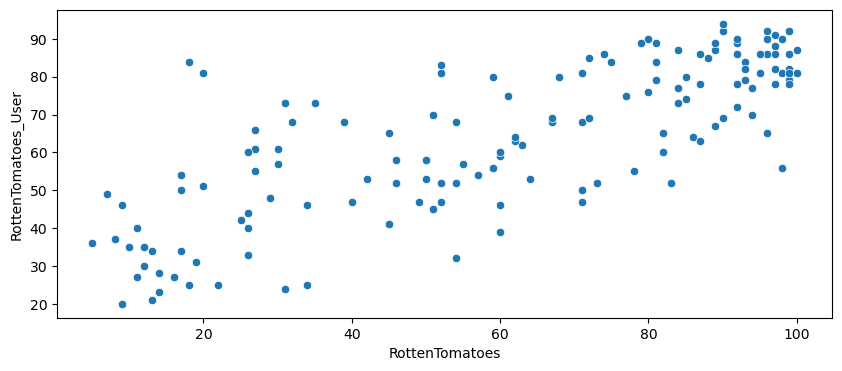

In [259]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=all_sites, x='RottenTomatoes', y='RottenTomatoes_User');

Lets try to quaantify the difference with this new column

In [271]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


In [283]:
all_sites['Rotten_Diff'].apply(abs).mean().round(2)

15.1

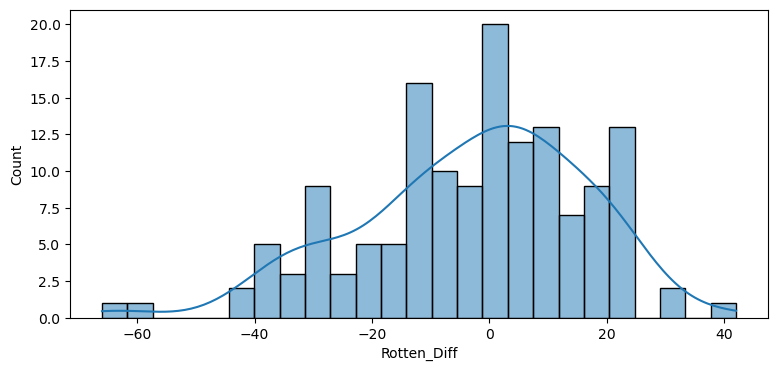

In [307]:
plt.figure(figsize=(9,4))
sns.histplot(data=all_sites, x='Rotten_Diff', bins=25, kde=True);

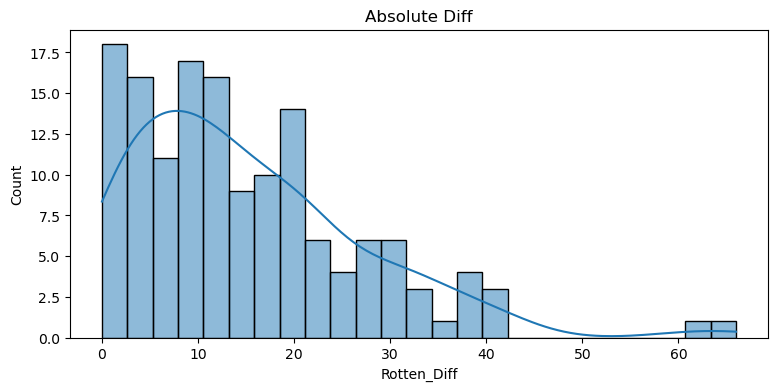

In [313]:
plt.figure(figsize=(9,4))
plt.title('Absolute Diff')
sns.histplot(data=all_sites, x=all_sites['Rotten_Diff'].apply(abs), bins=25, kde=True);

In [573]:
all_sites.sort_values('Rotten_Diff')[:5][['FILM','Rotten_Diff']]

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


In [575]:
all_sites.sort_values('Rotten_Diff', ascending=False)[:5][['FILM','Rotten_Diff']]

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
145,"Kumiko, The Treasure Hunter (2015)",24
37,Welcome to Me (2015),24


explore Metacritic

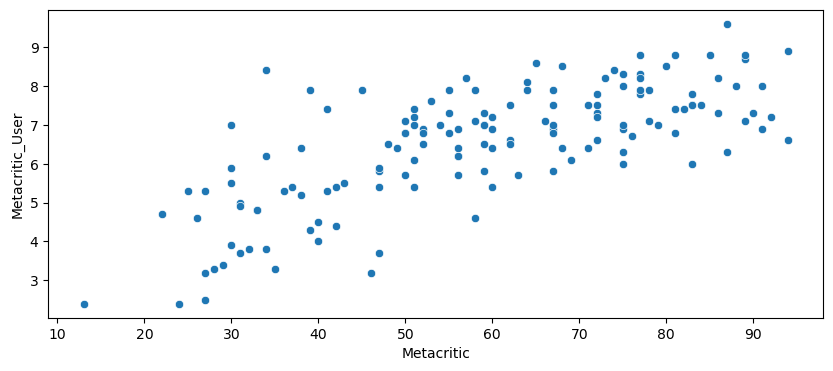

In [333]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=all_sites, x='Metacritic', y='Metacritic_User');

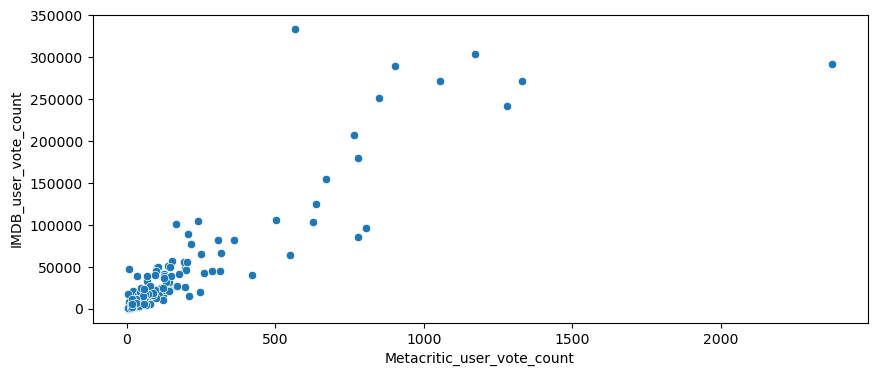

In [335]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=all_sites, x='Metacritic_user_vote_count', y='IMDB_user_vote_count');

In [339]:
all_sites.sort_values('IMDB_user_vote_count', ascending=False)[:1]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [341]:
all_sites.sort_values('Metacritic_user_vote_count', ascending=False)[:1]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


# Fandango vs others

inner merge between database for comparison

In [422]:
df = pd.merge(fandango, all_sites, how='inner', on='FILM')

In [424]:
df = df.drop('YEAR', axis=1)

In [426]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   RottenTomatoes              145 non-null    int64  
 5   RottenTomatoes_User         145 non-null    int64  
 6   Metacritic                  145 non-null    int64  
 7   Metacritic_User             145 non-null    float64
 8   IMDB                        145 non-null    float64
 9   Metacritic_user_vote_count  145 non-null    int64  
 10  IMDB_user_vote_count        145 non-null    int64  
 11  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 13.7+ KB


In [428]:
df.head()

,FILM,STARS,RATING,VOTES,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,98,90,94,8.9,8.6,807,96252,8


In [430]:
df.describe()

,STARS,RATING,VOTES,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,4.086207,3.841379,3817.696552,60.634483,63.696552,58.696552,6.508966,6.729655,184.489655,42572.186207,-3.062069
std,0.541169,0.502437,6368.668671,30.161098,19.974749,19.538183,1.510883,0.957944,317.361740,67558.506121,19.218488
min,3.000000,2.700000,35.000000,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000,-66.000000
25%,3.500000,3.500000,218.000000,31.000000,50.000000,43.000000,5.700000,6.300000,33.000000,5626.000000,-14.000000
50%,4.000000,3.900000,1430.000000,63.000000,66.000000,59.000000,6.800000,6.900000,72.000000,18986.000000,0.000000
75%,4.500000,4.200000,4279.000000,89.000000,81.000000,75.000000,7.500000,7.400000,167.000000,44711.000000,11.000000
max,5.000000,4.800000,34846.000000,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000,42.000000


normalize rating values

In [432]:
df['RottenTomatoes'] = (df['RottenTomatoes'] / 20).round(1)
df['RottenTomatoes_User'] = (df['RottenTomatoes_User'] / 20).round(1)
df['Metacritic'] = (df['Metacritic'] / 20).round(1)
df['Metacritic_User'] = (df['Metacritic_User'] / 2).round(1)
df['IMDB'] = (df['IMDB'] / 2).round(1)

In [436]:
df.head()

,FILM,STARS,RATING,VOTES,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,1.2,2.1,2.3,1.6,2.1,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,3.6,4.0,3.0,3.5,3.6,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,3.6,4.2,3.6,3.3,3.7,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,4.0,4.2,3.4,3.4,3.7,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,4.9,4.5,4.7,4.4,4.3,807,96252,8


In [450]:
norm_scores = df[['STARS','RATING','RottenTomatoes','RottenTomatoes_User','Metacritic','Metacritic_User','IMDB']]
norm_scores.head()

,STARS,RATING,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


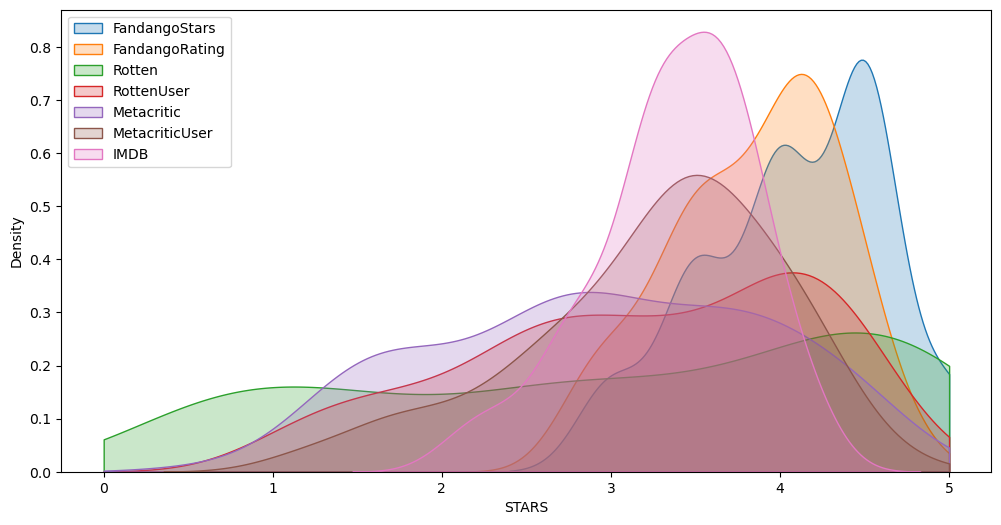

In [467]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data=norm_scores, x='STARS', fill=True, clip=[0,5], label='FandangoStars')
sns.kdeplot(data=norm_scores, x='RATING', fill=True, clip=[0,5], label='FandangoRating')
sns.kdeplot(data=norm_scores, x='RottenTomatoes', fill=True, clip=[0,5], label='Rotten')
sns.kdeplot(data=norm_scores, x='RottenTomatoes_User', fill=True, clip=[0,5], label='RottenUser')
sns.kdeplot(data=norm_scores, x='Metacritic', fill=True, clip=[0,5], label='Metacritic')
sns.kdeplot(data=norm_scores, x='Metacritic_User', fill=True, clip=[0,5], label='MetacriticUser')
sns.kdeplot(data=norm_scores, x='IMDB', fill=True, clip=[0,5], label='IMDB')
plt.legend(loc='upper left');

Clearly Fandango has an uneven distribution. Rotten critics the most uniform distribuition.

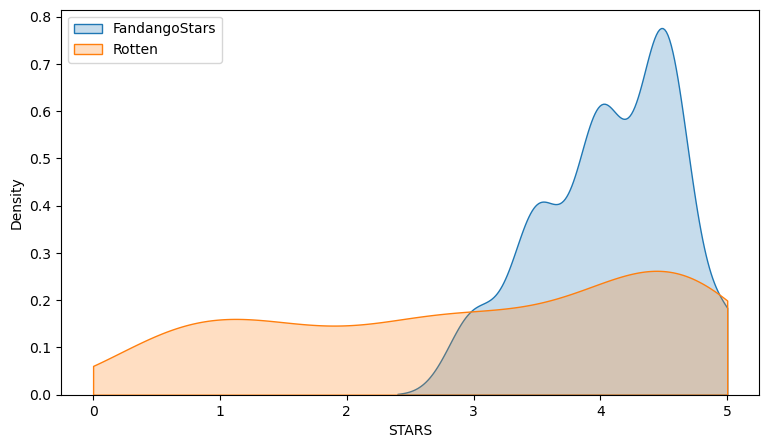

In [475]:
fig, ax = plt.subplots(figsize=(9, 5))
sns.kdeplot(data=norm_scores, x='STARS', fill=True, clip=[0,5], label='FandangoStars')
sns.kdeplot(data=norm_scores, x='RottenTomatoes', fill=True, clip=[0,5], label='Rotten')
plt.legend(loc='upper left');

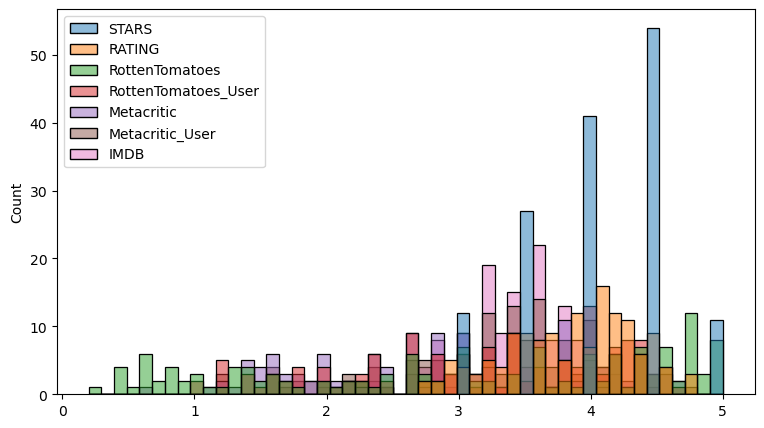

In [490]:
plt.figure(figsize=(9, 5))
sns.histplot(data=norm_scores, bins=50);

<Figure size 700x700 with 0 Axes>

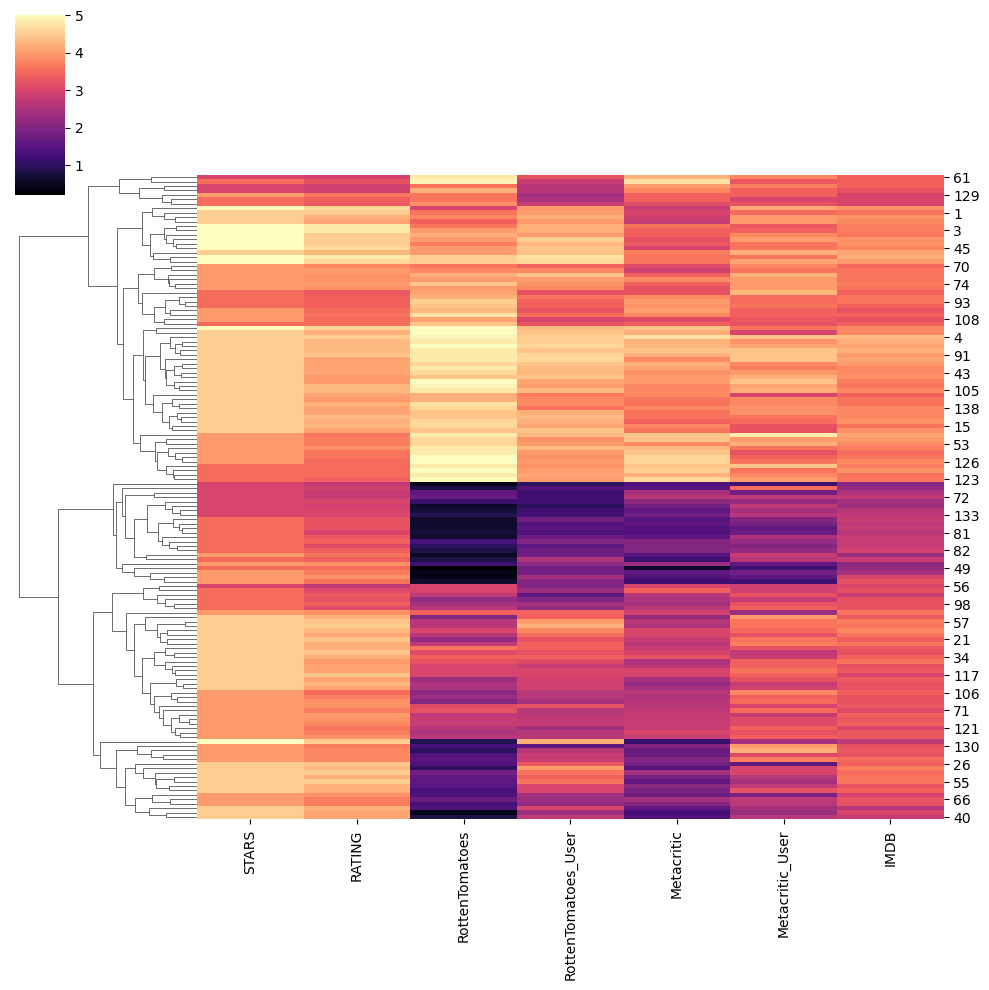

In [502]:
plt.figure(figsize=(7, 7))
sns.clustermap(data=norm_scores, cmap='magma', col_cluster=False);

again always high rate for fandango

In [518]:
worst_movies = df.sort_values('RottenTomatoes')[:10]
worst_movies

,FILM,STARS,RATING,VOTES,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,3054,0.2,1.8,0.6,1.2,2.2,211,15004,-31
25,Taken 3 (2015),4.5,4.1,6757,0.4,2.3,1.3,2.3,3.0,240,104235,-37
28,Fantastic Four (2015),3.0,2.7,6288,0.4,1.0,1.4,1.2,2.0,421,39838,-11
84,Hitman: Agent 47 (2015),4.0,3.9,917,0.4,2.4,1.4,1.6,3.0,67,4260,-42
54,Hot Pursuit (2015),4.0,3.7,2618,0.4,1.8,1.6,1.8,2.4,78,17061,-29
50,The Boy Next Door (2015),4.0,3.6,2800,0.5,1.8,1.5,2.8,2.3,75,19658,-25
109,The Vatican Tapes (2015),3.0,2.9,210,0.6,1.0,1.8,2.7,2.3,5,952,-8
88,The Loft (2015),4.0,3.6,811,0.6,2.0,1.2,1.2,3.2,80,21319,-29
87,Unfinished Business (2015),3.5,3.2,821,0.6,1.4,1.6,1.9,2.7,39,14346,-16
83,Sinister 2 (2015),3.5,3.3,973,0.6,1.7,1.6,2.5,2.8,37,3200,-21


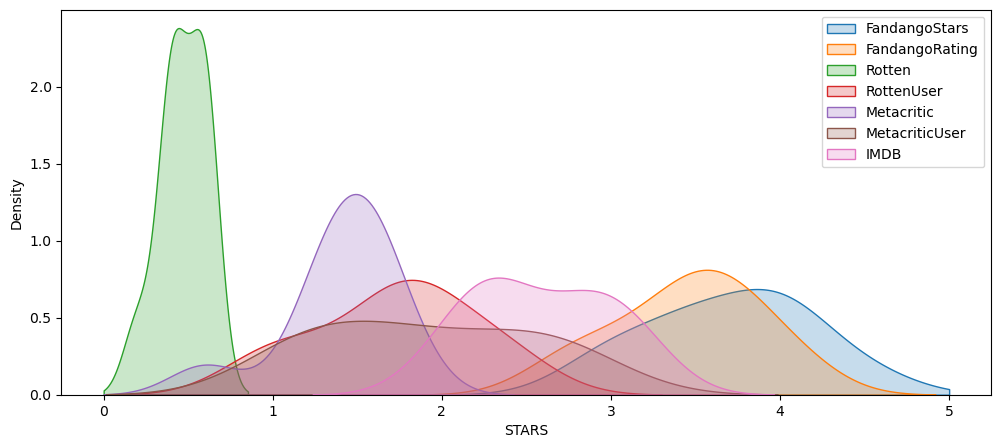

In [524]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.kdeplot(data=worst_movies, x='STARS', fill=True, clip=[0,5], label='FandangoStars')
sns.kdeplot(data=worst_movies, x='RATING', fill=True, clip=[0,5], label='FandangoRating')
sns.kdeplot(data=worst_movies, x='RottenTomatoes', fill=True, clip=[0,5], label='Rotten')
sns.kdeplot(data=worst_movies, x='RottenTomatoes_User', fill=True, clip=[0,5], label='RottenUser')
sns.kdeplot(data=worst_movies, x='Metacritic', fill=True, clip=[0,5], label='Metacritic')
sns.kdeplot(data=worst_movies, x='Metacritic_User', fill=True, clip=[0,5], label='MetacriticUser')
sns.kdeplot(data=worst_movies, x='IMDB', fill=True, clip=[0,5], label='IMDB')
plt.legend(loc='upper right');

as always fandango has the best scores for those movies

In [550]:
df['avg_other'] = (df['RottenTomatoes'] + df['RottenTomatoes_User'] + df['Metacritic'] + df['Metacritic_User'] + df['IMDB']) / 5

In [554]:
df['diff'] = df['STARS'] - df['avg_other']

In [568]:
df.sort_values('diff', ascending=False)[:3][['FILM','STARS','avg_other','diff']]

,FILM,STARS,avg_other,diff
67,Do You Believe? (2015),5.0,2.26,2.74
25,Taken 3 (2015),4.5,1.86,2.64
40,Pixels (2015),4.5,2.06,2.44


top 3 movies with higher differential between Fandango scores vs others

# Fandango clearly rate with super high score movies that are clearly not that good with avg review on other sites pretty low.